In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/cleaneddatanew.csv')
df

,Unnamed: 0,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...,...
13315,13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,ArsiaEx,3600,5.0,0.0,400.00
13317,13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df= df.drop(columns=['Unnamed: 0'])

df['price'].astype(int)
df['bath'].astype(int)
df['balcony'].astype(int)
df.describe()

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.688814,1.511937,112.565627
std,1.338754,0.864240,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


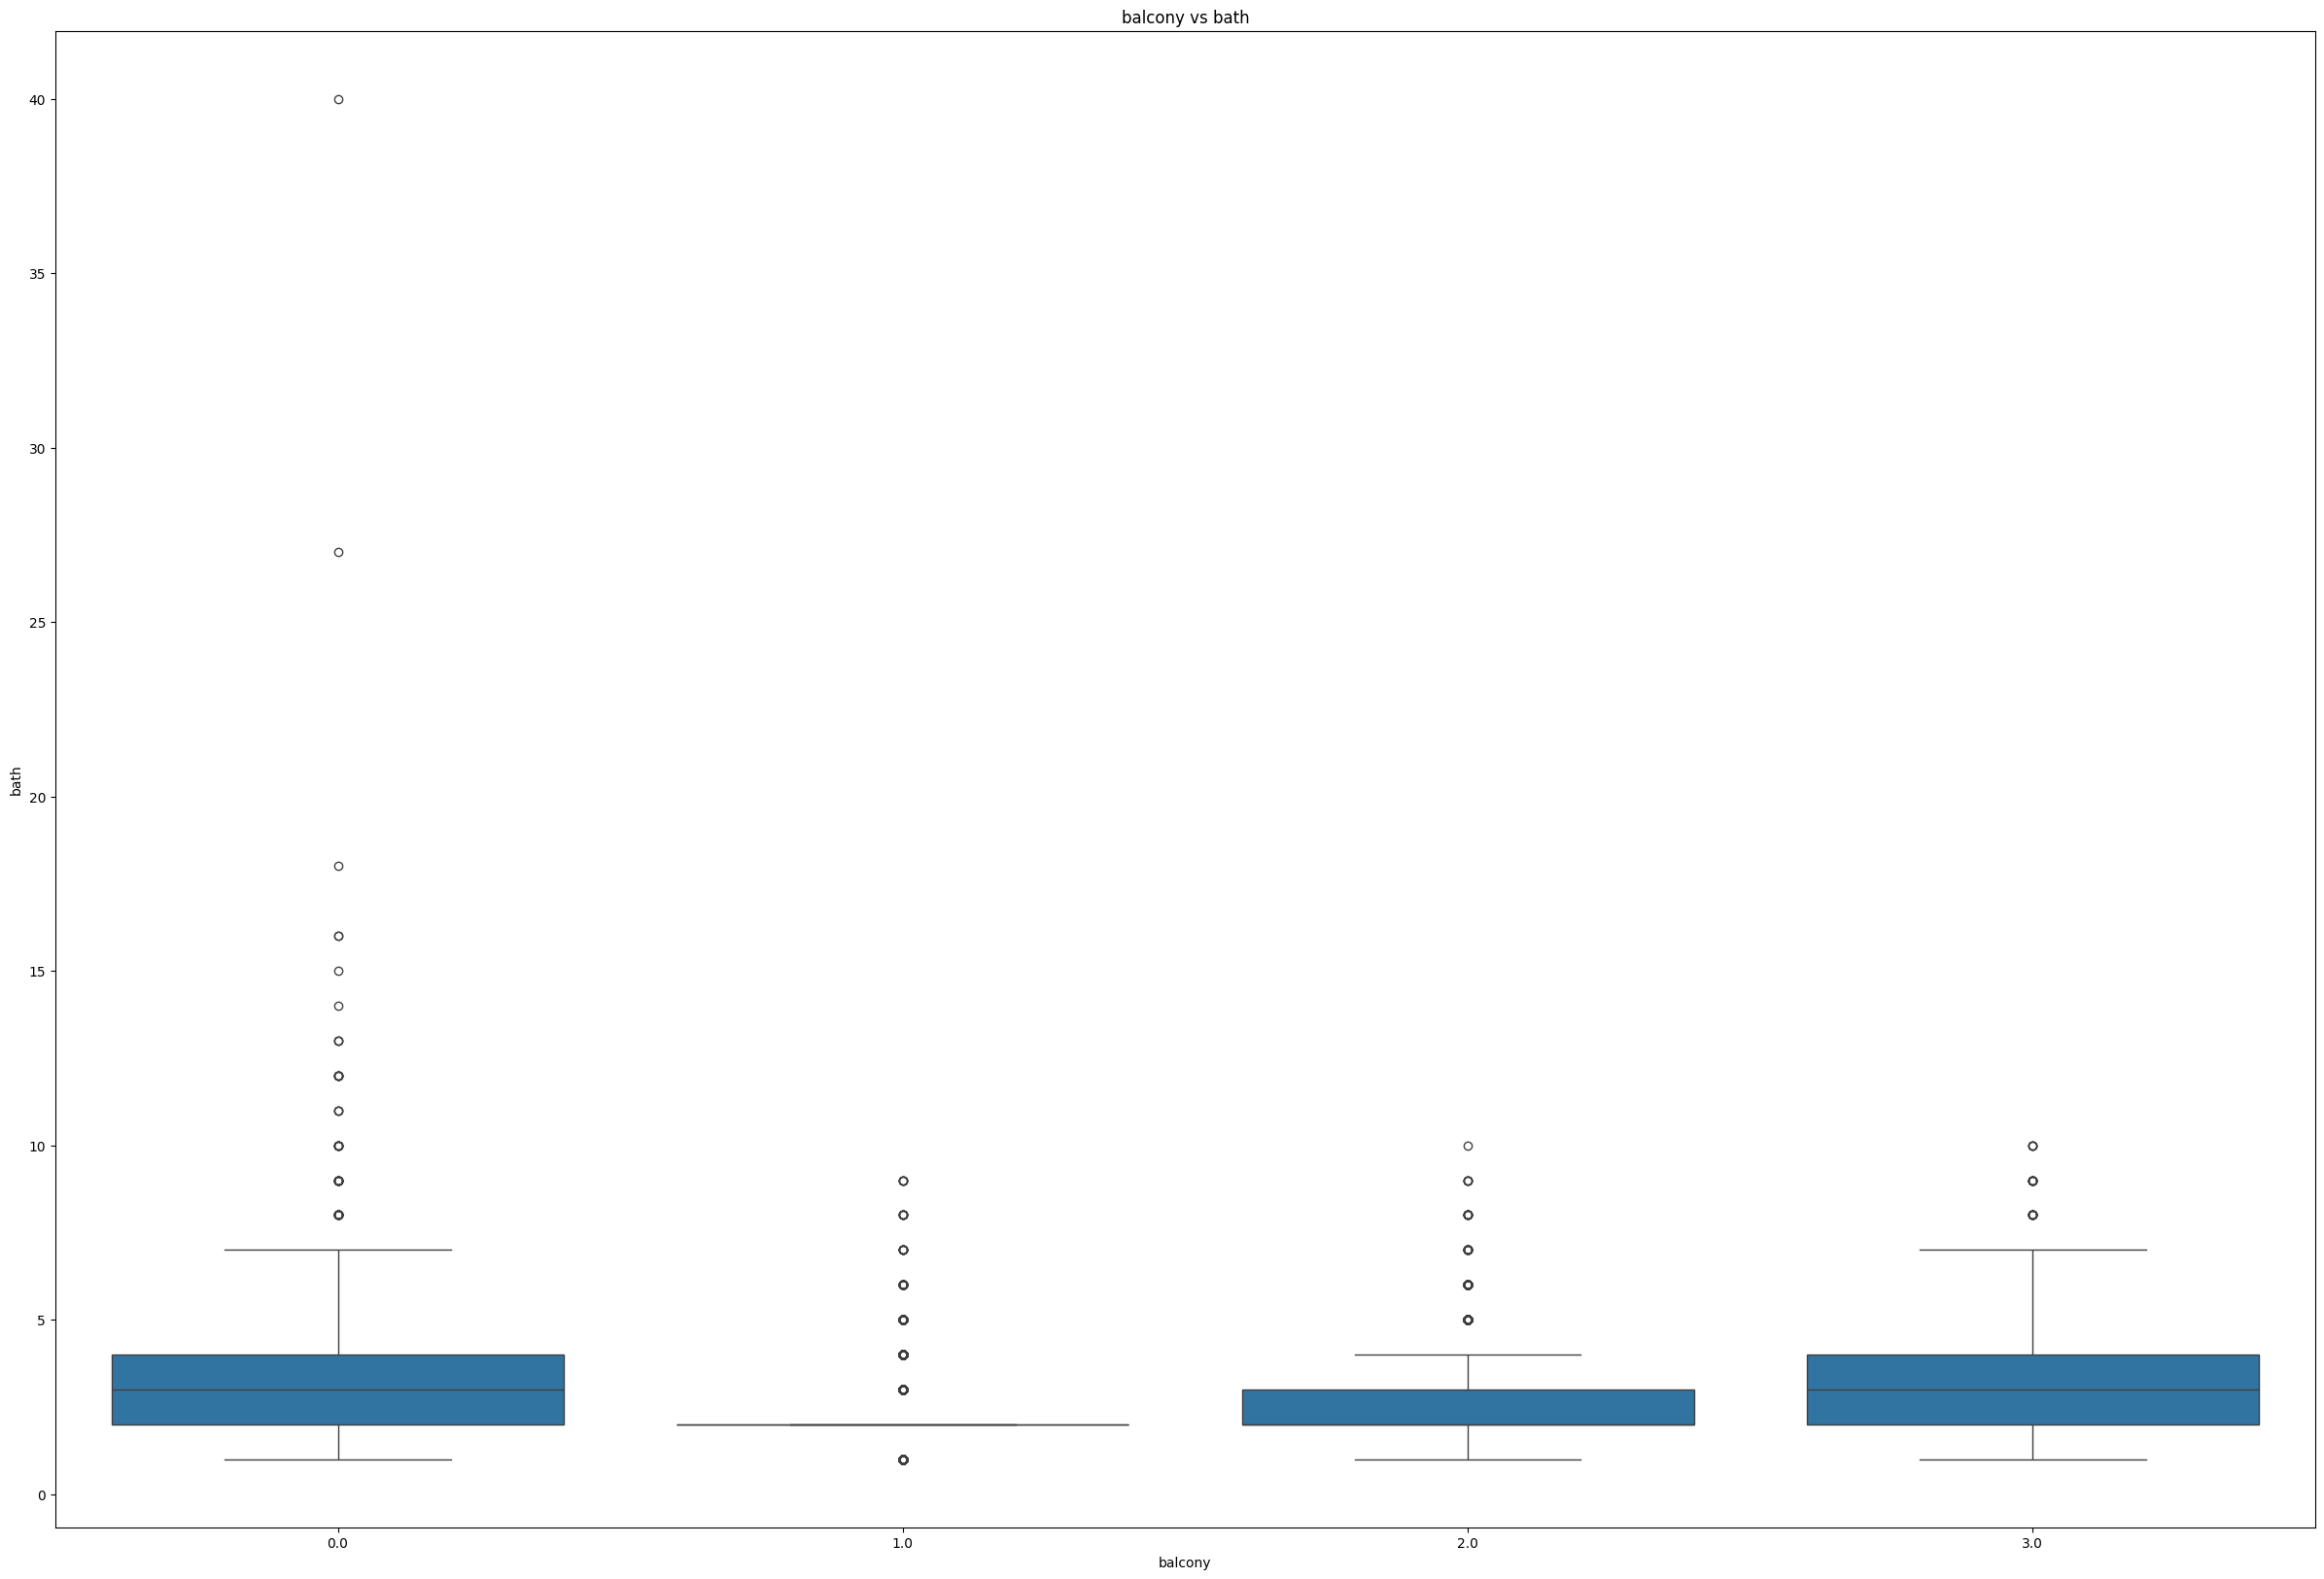

In [ ]:
plt.figure(figsize=(30,20))
sns.boxplot(x='balcony' , y='bath', data=df)
plt.title('balcony vs bath')
plt.show()

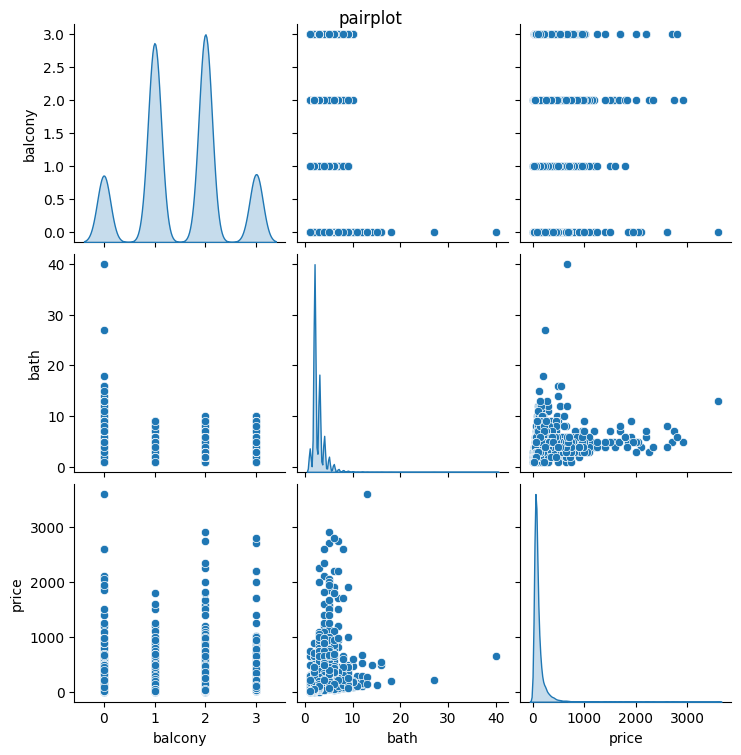

In [ ]:
sns.pairplot(df[['balcony', 'bath', 'price']], diag_kind='kde')
plt.suptitle("pairplot", y=1)
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.describe()

,bath,balcony,price
count,11213.000000,11213.000000,11213.000000
mean,2.307857,1.510925,73.174030
std,0.683196,0.810755,36.369353
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,46.500000
50%,2.000000,2.000000,65.000000
75%,3.000000,2.000000,90.000000
max,4.000000,3.000000,190.000000


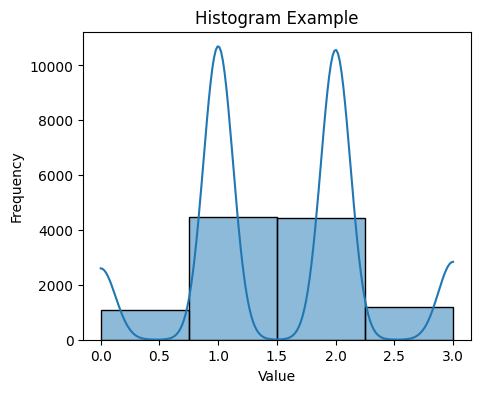

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['balcony'], bins=4, kde= True)
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.1% of the points cannot be plac

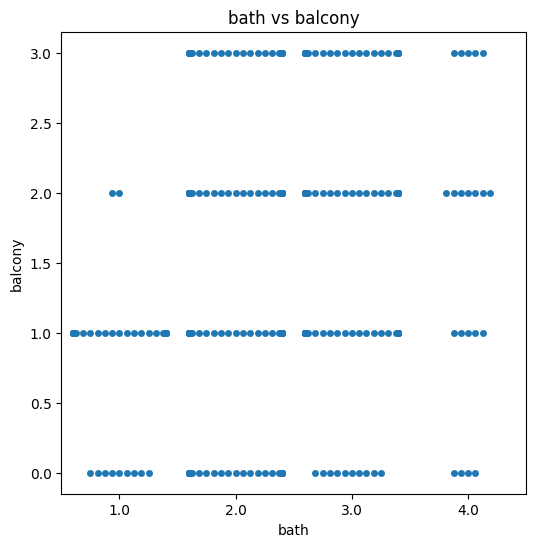

In [ ]:
plt.figure(figsize=(6,6))
sns.swarmplot(x='bath', y='balcony', data=df.head(500))
plt.title("bath vs balcony")
plt.show()

In [ ]:
df.to_csv('newdata4.csv')